# Old Faithful Geyser Clustering
Homework 3 - Problems 1 & 2

## Problem 1: Scatter Plot and Cluster Estimation

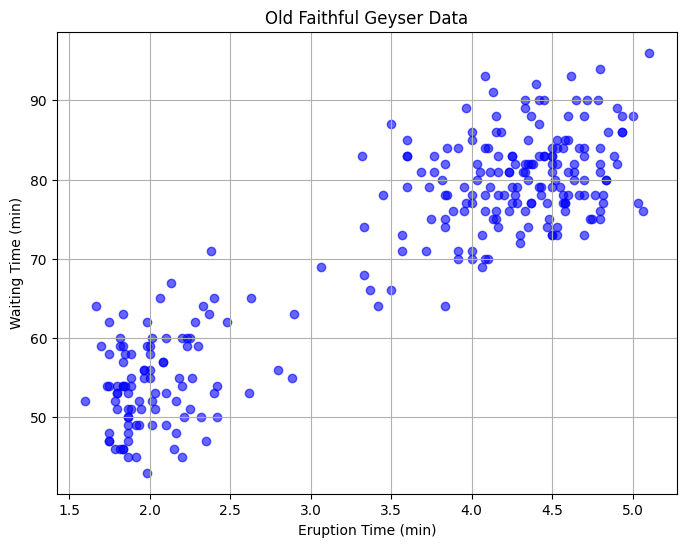

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('faithful.csv')
X = df[['eruptions', 'waiting']].values

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', alpha=0.6)
plt.xlabel('Eruption Time (min)')
plt.ylabel('Waiting Time (min)')
plt.title('Old Faithful Geyser Data')
plt.grid(True)
plt.show()


## Problem 2: K-Means Clustering

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# K-Means Functions
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def kmeans(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    objective_values = []

    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        obj = sum(np.sum((X[labels == i] - centroids[i])**2) for i in range(k))
        objective_values.append(obj)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids

    return centroids, labels, objective_values


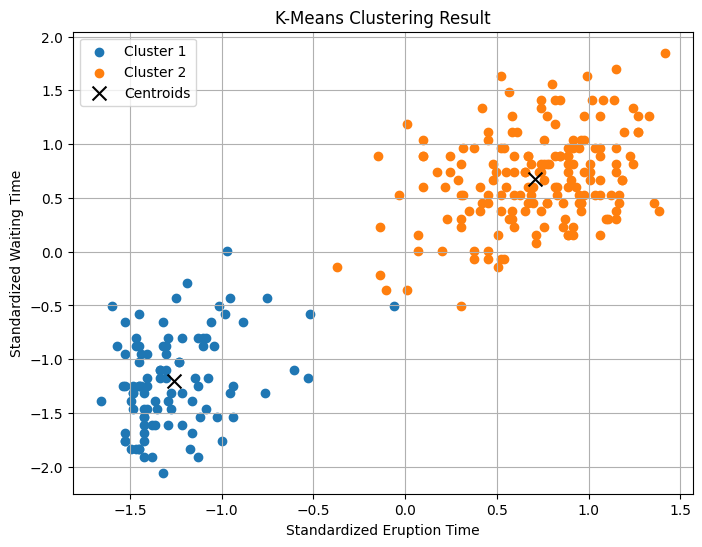

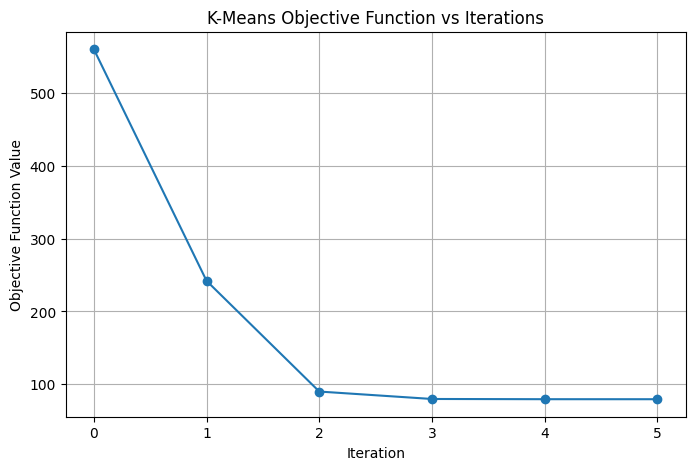

In [3]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run k-means
k = 2
centroids, labels, objective_values = kmeans(X_scaled, k)

# Plot clustering result
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_scaled[labels == i, 0], X_scaled[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
plt.xlabel('Standardized Eruption Time')
plt.ylabel('Standardized Waiting Time')
plt.title('K-Means Clustering Result')
plt.legend()
plt.grid(True)
plt.show()

# Plot objective function
plt.figure(figsize=(8, 5))
plt.plot(objective_values, marker='o')
plt.title('K-Means Objective Function vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.grid(True)
plt.show()
